# Example Stellar Query

After following the setup guide in the [README](https://github.com/leejt489/battery-research/blob/master/README.md), you should be able to query the data to get a data frame and get started on your analysis

                                         time  batteryVoltage  batteryCurrent
time                                                                         
2018-11-14 00:00:00+00:00 2018-11-14 00:00:00          52.500          -2.275
2018-11-14 00:05:00+00:00 2018-11-14 00:05:00          52.500          -2.300
2018-11-14 00:10:00+00:00 2018-11-14 00:10:00          52.500          -2.300
2018-11-14 00:15:00+00:00 2018-11-14 00:15:00          52.500          -2.300
2018-11-14 00:20:00+00:00 2018-11-14 00:20:00          52.500          -2.300
2018-11-14 00:25:00+00:00 2018-11-14 00:25:00          52.500          -2.300
2018-11-14 00:30:00+00:00 2018-11-14 00:30:00          52.500          -2.300
2018-11-14 00:35:00+00:00 2018-11-14 00:35:00          52.500          -2.300
2018-11-14 00:40:00+00:00 2018-11-14 00:40:00          52.500          -2.300
2018-11-14 00:45:00+00:00 2018-11-14 00:45:00          52.500          -2.275
2018-11-14 00:50:00+00:00 2018-11-14 00:50:00          52.500   

<IPython.core.display.Javascript object>


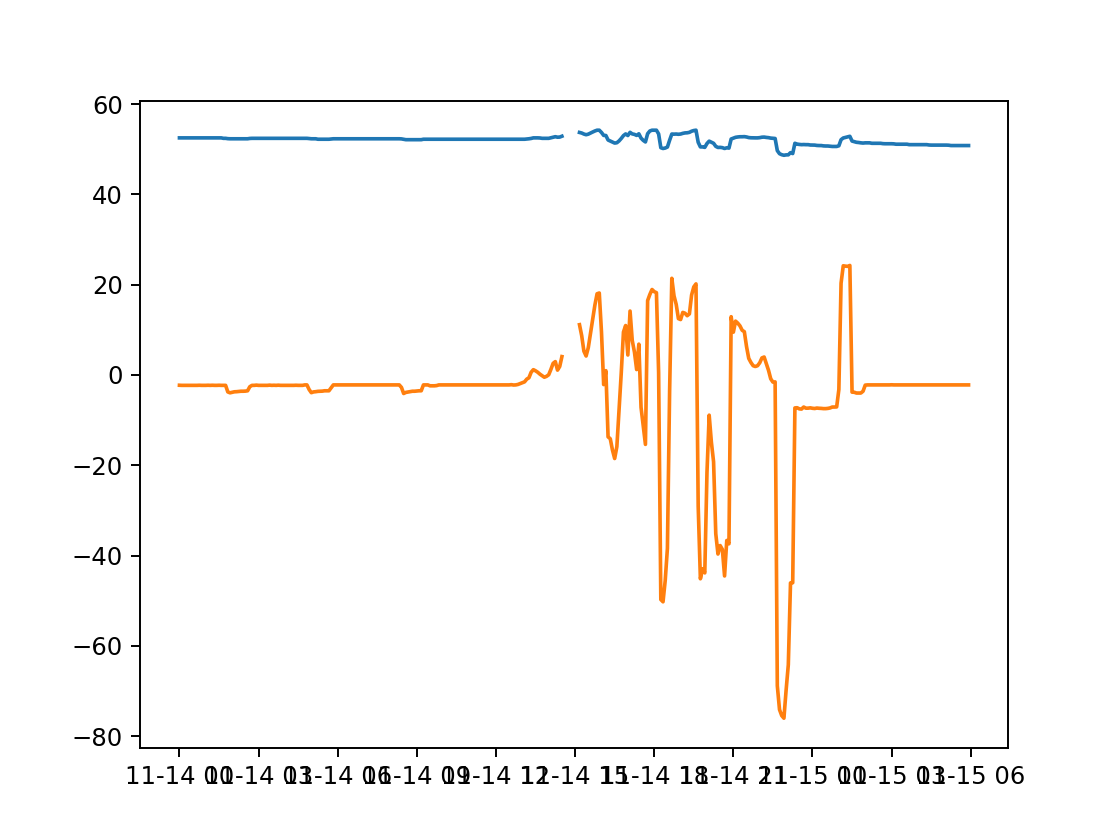

c:\users\leejt\documents\code projects\battery-research\env\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [1]:
%matplotlib notebook

import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

from auth_config import stellar_token as token
from stellar_client import StellarClient

# Set start and end times
t_start = dt.datetime(2018, 11, 14)
t_stop = dt.datetime(2018, 11, 15, 6)

# Set parameters that you want
parameters = 'batteryVoltage,batteryCurrent'

# Example parameters:
# ambientTemperature,dcBusVoltage,batteryVoltage,batteryStateOfCharge,
# batteryChargeEnergy,batteryDischargeEnergy,loadVoltage,lifetimeLoadEnergy,
# lifetimeMeteredLoadEnergy,lifetimeSolarEnergy,solarChargerVoltage,
# batteryPowerOut,solarPower,loadPower,meteredLoadPower

# Set the time resolution here
t_interval = '5-mins'

# Put the info to look up the system here
power_system = {
    'org': 'newsunroad',
    'site': 'pc_solstation_a'
}

# File to save - best to use the name 'out.csv' so you don't check in
save_to = 'out.csv'

# Get the data
client = StellarClient(
    system=power_system,
    parameters=parameters,
    t_interval=t_interval,
    token=token,
    save_to=save_to,
    batch_size_days=20
)

# Now you have a data frame to work with
df = client.get_data(t_start=t_start, t_stop=t_stop)
print(df)

# You can also re-load from the csv
df2 = pd.read_csv(save_to)

plt.plot(df[['batteryVoltage','batteryCurrent']]);